In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [82]:
df = pd.read_csv("bitcoin_historical_data.csv")
df = df.sort_index(ascending=False)
df["Date"] = pd.to_datetime(df['Date'])
df = df.replace(',','', regex=True)
df = df.replace('K','000', regex=True)
df = df.replace('%','', regex=True)
df = df.replace('-','0', regex=True)
df = df.replace('M','0000000', regex=True)
df = df.rename(columns={'Vol.': "Vol(K)"})
df_y = df[["Date", "Price"]]
df_y["Date"] -= datetime.timedelta(days=1)
df = df.drop(columns=["Price"])
columns = df.columns.drop(['Date'])
for column in columns:
    df[column] = df[column].astype('float')
df["diff_between_low_and_high"] = df["High"] - df["Low"]
df["diff_between_low_and_open"] = df["Open"] - df["Low"]
df["diff_between_high_and_open"] = df["High"] - df["Open"]

for column in ["diff_between_low_and_high", "diff_between_low_and_open", "diff_between_high_and_open", "Change %"]:
    df[f"MA_{column}_3"] = df[column].rolling(window=3).mean()
    df[f"MA_{column}_5"] = df[column].rolling(window=5).mean()
    df[f"MA_{column}_7"] = df[column].rolling(window=7).mean()
    df[f"MA_{column}_10"] = df[column].rolling(window=10).mean()
print(df.shape)
df.head()

(4115, 25)


<ipython-input-82-fd090bb7c487>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y["Date"] -= datetime.timedelta(days=1)


,Date,Open,High,Low,Vol(K),Change %,diff_between_low_and_high,diff_between_low_and_open,diff_between_high_and_open,MA_diff_between_low_and_high_3,...,MA_diff_between_low_and_open_7,MA_diff_between_low_and_open_10,MA_diff_between_high_and_open_3,MA_diff_between_high_and_open_5,MA_diff_between_high_and_open_7,MA_diff_between_high_and_open_10,MA_Change %_3,MA_Change %_5,MA_Change %_7,MA_Change %_10
4114,2010-07-18,0.0,0.1,0.1,0.08,0.0,0.0,-0.1,0.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4113,2010-07-19,0.1,0.1,0.1,0.57,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4112,2010-07-20,0.1,0.1,0.1,0.26,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.033333,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4111,2010-07-21,0.1,0.1,0.1,0.58,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.000000,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4110,2010-07-22,0.1,0.1,0.1,2.16,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.000000,0.02,NaN,NaN,0.0,0.0,NaN,NaN


In [83]:
df2 = pd.read_csv('nasdaq.csv')
df2 = df2.drop(columns=["Unnamed: 0"])
df2 = df2.drop(columns= ["BCHAIN-BCDDY", "BCHAIN-BCDDM", "BCHAIN-BCDDW", "BCHAIN-BCDDE", "BCHAIN-BCDDC",
                        "BCHAIN-TVTVR", "BCHAIN-NETDF", "BCHAIN-MIOPM"])
df2 = df2.interpolate(limit_direction='both')
df2["Date"] = pd.to_datetime(df2['Date'])
print(df2.shape)
df2.head()

(4676, 26)


,Date,BCHAIN-MKPRU,BCHAIN-TRVOU,BCHAIN-DIFF,BCHAIN-MWNUS,BCHAIN-AVBLS,BCHAIN-BLCHS,BCHAIN-ATRCT,BCHAIN-MIREV,BCHAIN-HRATE,...,BCHAIN-NADDU,BCHAIN-NTREP,BCHAIN-NTRAT,BCHAIN-NTRAN,BCHAIN-TRFUS,BCHAIN-TRFEE,BCHAIN-MKTCP,BCHAIN-TOTBC,BCHAIN-MWNTD,BCHAIN-MWTRV
0,2021-10-21,66063.56,6.500925e+08,2.008246e+13,77814069.0,1.179139,370416.660376,7.141667,6.174249e+07,1.487474e+08,...,713105.0,289732.0,679675451.0,291813.0,1.228068e+06,18.745020,1.240762e+12,18849400.00,79361.0,15981.780818
1,2021-10-20,64287.64,5.944569e+08,2.008246e+13,77814069.0,1.179139,370416.660376,7.141667,6.174249e+07,1.487474e+08,...,713105.0,289732.0,679675451.0,291813.0,1.228068e+06,18.745020,1.240762e+12,18849400.00,79361.0,15981.780818
2,2021-10-19,61971.59,7.538423e+08,2.008246e+13,77781139.0,1.302748,370214.944950,8.050000,6.180473e+07,1.547372e+08,...,743673.0,309762.0,679364585.0,312018.0,9.418893e+05,15.007076,1.206645e+12,18848525.00,79361.0,15981.780818
3,2021-10-18,61546.21,2.710150e+08,1.991736e+13,77745372.0,1.212651,370035.149167,7.450000,5.817390e+07,1.465344e+08,...,693822.0,283337.0,679078376.0,285368.0,9.780623e+05,15.829361,1.164979e+12,18847431.25,75076.0,10878.617295
4,2021-10-17,60948.78,2.636285e+08,1.989305e+13,77719946.0,0.903351,369890.901353,4.658333,6.155580e+07,1.582222e+08,...,559522.0,214110.0,678863878.0,215883.0,6.898199e+05,11.342678,1.144589e+12,18846556.25,54659.0,28954.457289


In [84]:
df = pd.merge(df, df2, how="left", on=["Date"])
df_date = df["Date"]
df_x = df.drop(columns=["Date"])
#normalized_df=(df_x-df_x.mean())/df_x.std()
df.head()

,Date,Open,High,Low,Vol(K),Change %,diff_between_low_and_high,diff_between_low_and_open,diff_between_high_and_open,MA_diff_between_low_and_high_3,...,BCHAIN-NADDU,BCHAIN-NTREP,BCHAIN-NTRAT,BCHAIN-NTRAN,BCHAIN-TRFUS,BCHAIN-TRFEE,BCHAIN-MKTCP,BCHAIN-TOTBC,BCHAIN-MWNTD,BCHAIN-MWTRV
0,2010-07-18,0.0,0.1,0.1,0.08,0.0,0.0,-0.1,0.1,NaN,...,519.0,420.0,87860.0,487.0,0.0,0.31,0.0,3443100.0,0.0,0.0
1,2010-07-19,0.1,0.1,0.1,0.57,0.0,0.0,0.0,0.0,NaN,...,757.0,627.0,88487.0,627.0,0.0,0.00,0.0,3462950.0,0.0,0.0
2,2010-07-20,0.1,0.1,0.1,0.26,0.0,0.0,0.0,0.0,0.0,...,536.0,465.0,88011.0,594.0,0.0,0.00,0.0,3473050.0,0.0,0.0
3,2010-07-21,0.1,0.1,0.1,0.58,0.0,0.0,0.0,0.0,0.0,...,524.0,463.0,89380.0,428.0,0.0,0.00,0.0,3465450.0,0.0,0.0
4,2010-07-22,0.1,0.1,0.1,2.16,0.0,0.0,0.0,0.0,0.0,...,464.0,392.0,89772.0,392.0,0.0,0.01,0.0,3492100.0,0.0,0.0


In [85]:
df.dropna(inplace=True)
df = pd.merge(df, df_y, how="left", on="Date")
df = df[df["Date"] >=datetime.datetime(2019,1,1)]
df.to_csv('final_dataset.csv', index=False)

In [86]:
df_y["Date"] -= datetime.timedelta(days=1)
df_y

,Date,Price
4114,2010-07-16,0.1
4113,2010-07-17,0.1
4112,2010-07-18,0.1
4111,2010-07-19,0.1
4110,2010-07-20,0.1
...,...,...
4,2021-10-16,62056.3
3,2021-10-17,64278.5
2,2021-10-18,65979.1
1,2021-10-19,62210.2


In [44]:
df2 = pd.read_csv('nasdaq.csv')
df2.shape

(4676, 35)

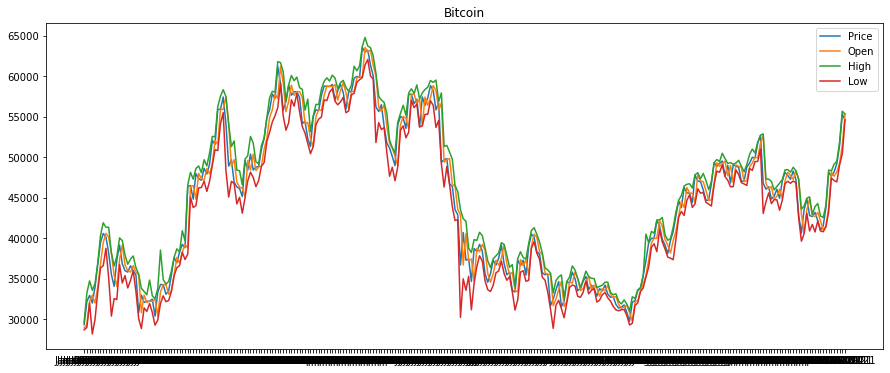

In [4]:
columns = df.columns.drop(['Date', "Vol.", "Change %"])
# create figure and axis
fig, ax = plt.subplots(figsize=(15.0, 6.0))
# plot each column
for column in columns:
    ax.plot(df['Date'], df[column], label=column)
# set title and legend
ax.set_title('Bitcoin')
ax.legend()

In [5]:
df["Low"].replace(',', '').astype(str).astype('float')

279    28712.4
278    29008.0
277    32029.6
276    28204.5
275    30010.5
        ...   
4      47123.0
3      46958.6
2      49060.1
1      50439.5
0      54593.5
Name: Low, Length: 280, dtype: float64

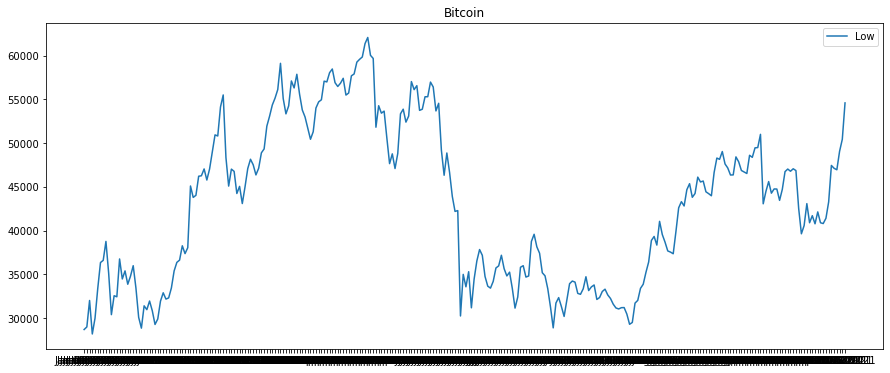

In [47]:
x_data = range(0, df.shape[0])
fig, ax = plt.subplots(figsize=(15.0, 6.0))
ax.plot(df['Date'], df["Low"], label="Low")
ax.set_title('Bitcoin')
ax.legend()

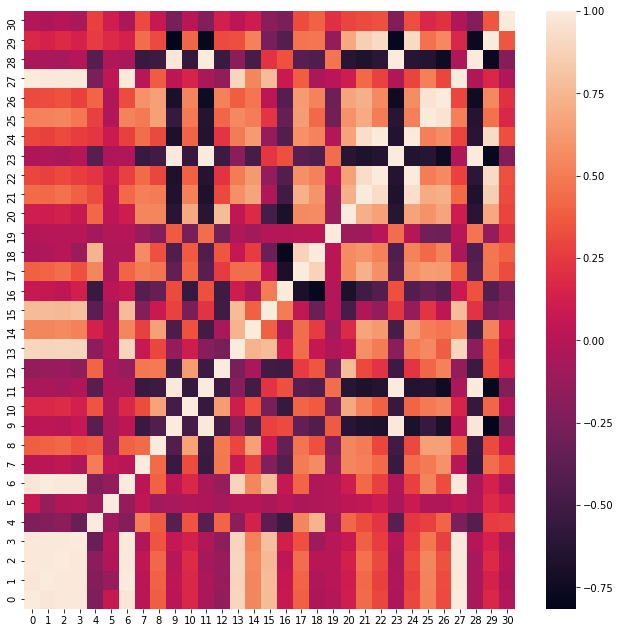

In [68]:
correlation_matrix = np.corrcoef(normalized_df.transpose())
plt.figure(figsize=(11,11))
sns.heatmap(correlation_matrix)
plt.ylim(0, correlation_matrix.shape[0])
plt.show()